### Optimize the XY sequence with GA

In [1]:
from deap import base, creator, tools, algorithms
import numpy as np
import random
import RSC_sim
from datetime import datetime

### Original as reference, 25 $\mu K$

Applying pulses: 100%|██████████| 40/40 [00:07<00:00,  5.42it/s]


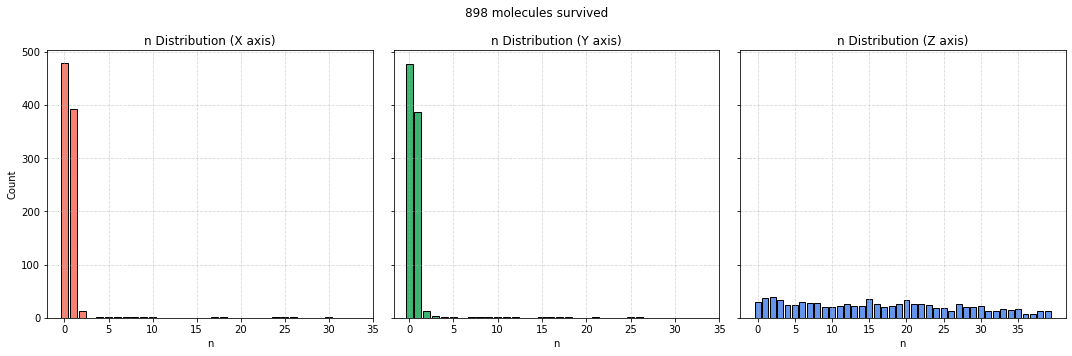

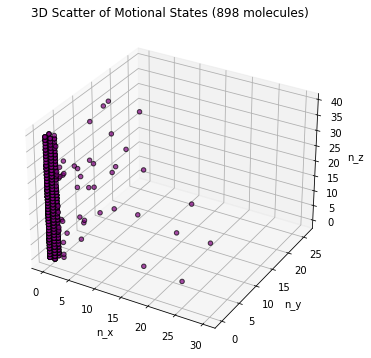

In [4]:
XY = RSC_sim.load_sequence('sequence_XY.txt')
mol_list = RSC_sim.initialize_thermal([25e-6, 25e-6, 25e-6], 1000)
_ = RSC_sim.apply_raman_sequence(mol_list, XY)
counts_x, counts_y, counts_z = RSC_sim.get_n_distribution(mol_list)

#### Cost funtion be the number of counts in radial n=0,1 states

In [5]:
def cost_function(mol_list):
    cost = 0
    for mol in mol_list:
        if mol.n[0] <= 1 and mol.n[1] <= 1:
            cost += 1
    return cost

In [6]:
print(cost_function(mol_list))

852


### -5 < $\Delta n$ < -1, run 1

Applying pulses: 100%|██████████| 40/40 [00:06<00:00,  5.92it/s]


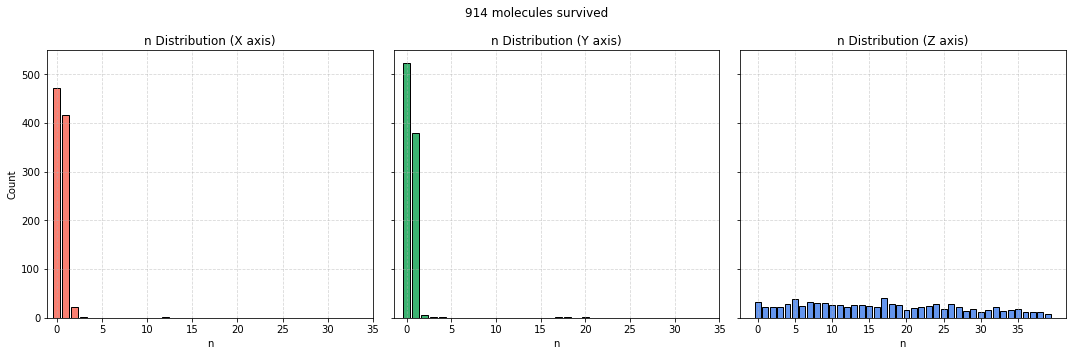

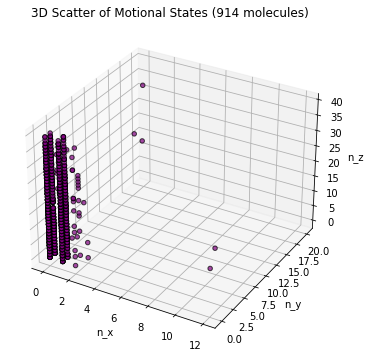

891


In [9]:
seq = RSC_sim.load_sequence('sequences/2025-09-23_00-30-49/best_sequence.txt')
mol_list = RSC_sim.initialize_thermal([25e-6, 25e-6, 25e-6], 1000)
_ = RSC_sim.apply_raman_sequence(mol_list, seq)
counts_x, counts_y, counts_z = RSC_sim.get_n_distribution(mol_list)
print(cost_function(mol_list))